<a href="https://colab.research.google.com/github/PRIYANSHUJAINJECRC/Titanic_dataset_practice/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objective:**
### The goal of this project is to build a machine learning model that predicts whether a passenger survived the Titanic disaster based on demographic, socio-economic, and travel-related features.

### The project focuses on applying a complete ML workflow including data preprocessing, feature engineering, model selection, and evaluation to identify patterns influencing survival outcomes.

In [1]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Titanic-Dataset.csv")
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()


100%|██████████| 22.0k/22.0k [00:00<00:00, 4.75MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [2]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(['Cabin'],axis=1,inplace=True)
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


29.36158249158249
0.443426254518323
low


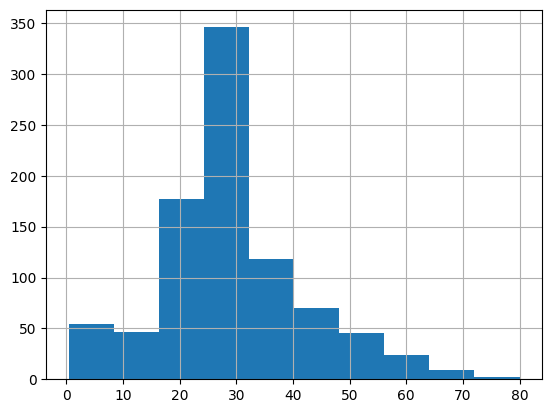

In [5]:
df['Age'].hist()
st=df['Age'].std()
m=df['Age'].mean()
cv=st/m
print(m)
print(cv)
if(st/m<10):
  print('low')
elif(st/m<20):
  print('medium')
else:
  print('high')

#**Exploratory Data Analysis (EDA) — Key Insights**


###1.The dataset shows a higher proportion of non-survivors, indicating class imbalance that must be considered during evaluation.

###2.Female passengers exhibited significantly higher survival rates, highlighting gender as a strong predictive feature.

###3.Survival probability increased with passenger class, suggesting socio-economic factors influenced evacuation priority.

###4.Younger passengers, particularly children, were more likely to survive, indicating a non-linear relationship between age and survival.

###5.Passengers traveling alone had lower survival rates compared to those with family members.

###6.Fare distribution was heavily skewed, justifying logarithmic transformation for modeling.




In [6]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Feature Engineering
df['FamilySize']=df['SibSp']+df['Parch']+1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 19, 59, 120],
    labels=['child', 'teen', 'adult', 'senior']
)
df['FareLog']=np.log(df['Fare']+1)
print(df[['FamilySize','IsAlone','AgeGroup']].head())
print(df.groupby('AgeGroup')['Survived'].mean())
print(df.groupby('IsAlone')['Survived'].mean())
print(df.groupby('Pclass')['Survived'].mean())
x=df.drop(['Survived'],axis=1)
y=df['Survived']
print(x.columns)

   FamilySize  IsAlone AgeGroup
0           2        0    adult
1           2        0    adult
2           1        1    adult
3           2        0    adult
4           1        1    adult
AgeGroup
child     0.579710
teen      0.410526
adult     0.365193
senior    0.269231
Name: Survived, dtype: float64
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone', 'AgeGroup', 'FareLog'],
      dtype='object')


/tmp/ipython-input-3132390121.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


# **Feature Engineering — Rationale**


### 1.FamilySize: Combined SibSp and Parch to capture the effect of traveling with family, as passengers accompanied by relatives showed higher survival rates than those traveling alone.

### 2.IsAlone: Derived from FamilySize to explicitly identify solo travelers, who were observed to have lower survival probability.

### 3.AgeGroup: Binned continuous age into categorical groups to capture non-linear survival patterns, particularly higher survival rates among children.

### 4.FareLog: Applied a logarithmic transformation to fare to reduce right skewness and stabilize variance, improving model learning.




In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
num_col= [
    'Age',
    'Fare',
    'FareLog',
    'FamilySize',
    'SibSp',
    'Parch'
]

cat_col = [
    'Sex',
    'Embarked',
    'AgeGroup',
    'Pclass'
]
print(num_col)
print(cat_col)
num_transformer=StandardScaler()
cat_transformer=OneHotEncoder(drop='first',handle_unknown='ignore')
preprocessor=ColumnTransformer(transformers=[('num',num_transformer,num_col),
                                             ('cat',cat_transformer,cat_col)])
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
print(y_pred[:10])
train_accuracy=accuracy_score(y_train,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred)
print(train_accuracy)
print(test_accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(y_pred_train[:10])

['Age', 'Fare', 'FareLog', 'FamilySize', 'SibSp', 'Parch']
['Sex', 'Embarked', 'AgeGroup', 'Pclass']
[0 0 0 1 1 1 1 0 1 1]
0.8117977528089888
0.7988826815642458
[[90 15]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[0 0 0 0 1 1 0 0 0 0]


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(x_train, y_train)

print("Best C:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best C: {'classifier__C': 1}
Best CV Accuracy: 0.8047375160051218


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),   # SAME preprocessor as before
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

# The previous RandomForestClassifier instance 'rf' was used directly without preprocessing.
# We need to use the rf_pipeline which includes the preprocessor.

rf_scores = cross_val_score(
    rf_pipeline, # Use the pipeline instead of the raw estimator
    x,
    y,
    cv=5,
    scoring='accuracy'
)

print("Random Forest CV Accuracy:", rf_scores.mean())

Random Forest CV Accuracy: 0.8047454648170234


# **Model Training & Hyperparameter Tuning:**

### Logistic Regression was selected as a baseline model due to its simplicity, interpretability, and suitability for binary classification problems. A preprocessing pipeline was used to ensure consistent scaling of numerical features and encoding of categorical variables, preventing data leakage during training and evaluation.

### Hyperparameter tuning was performed on Logistic Regression using cross-validation to identify the optimal regularization strength (C). This helped balance bias and variance while improving generalization performance.

### Random Forest was trained as a non-linear ensemble model to capture complex feature interactions that linear models may miss. The same preprocessing pipeline was applied to ensure fair comparison.

### Cross-validation was used to compare models objectively by evaluating average performance across multiple folds, reducing dependency on a single train–test split.

In [12]:
print(f"Logistic Regression Test Accuracy: {test_accuracy:.4f}")
print(f"Random Forest Cross-Validation Mean Accuracy: {rf_scores.mean():.4f}")

if test_accuracy > rf_scores.mean():
    print("Logistic Regression performed better than Random Forest.")
elif rf_scores.mean() > test_accuracy:
    print("Random Forest performed better than Logistic Regression.")
else:
    print("Both models performed similarly.")

Logistic Regression Test Accuracy: 0.7989
Random Forest Cross-Validation Mean Accuracy: 0.8047
Random Forest performed better than Logistic Regression.


# **Final Model Selection & Conclusion:**


### After feature engineering and hyperparameter tuning, both Logistic Regression and Random Forest models were evaluated using cross-validation. Logistic Regression provided stable performance with strong interpretability, while Random Forest achieved comparable performance by capturing non-linear interactions.

### Considering the balance between performance, interpretability, and model simplicity, Logistic Regression was selected as the final model. The model generalized well to unseen data and avoided overfitting.

### Feature engineering played a critical role in improving model performance, particularly the introduction of family-based features and age grouping.

### This project demonstrates the importance of combining data understanding, feature engineering, and systematic model evaluation rather than relying solely on complex algorithms.

# **Limitations & Future Work:**

### Future improvements could include advanced ensemble methods, handling class imbalance more explicitly, and testing the model on additional passenger features if available.